In [65]:
%matplotlib inline  
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure
# From http://pandas.pydata.org/pandas-docs/version/0.23/visualization.html
# http://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#scatter-matrix-plot
# from mpl_toolkits.mplot3d import Axes3D
# This import registers the 3D projection, but is otherwise unused.  DO NOT REMOVE IT
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy import stats
print(sys.version)

3.6.6 (default, Sep 12 2018, 18:26:19) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [66]:
FILENAME="performance_20181106-1107"
df = pd.read_csv(FILENAME+".csv")
df4=df[df['proto'] =='IPv4']
df6=df[df['proto'] =='IPv6']

In [67]:
df6

,retries,elapsed,delay,loss,size,rate,proto,GTRs
1,0,9.524200e-02,0.0,0.0,1000,10500.00,IPv6,1
3,0,1.142390e-01,0.0,0.0,1000,8754.00,IPv6,0
5,0,1.330080e-01,0.0,0.0,1000,7518.00,IPv6,1
7,0,1.990360e-01,0.0,0.0,1000,5024.00,IPv6,0
9,0,1.357682e+00,0.0,0.0,1000,736.50,IPv6,6
11,0,4.998840e-01,0.0,0.0,1000,2000.00,IPv6,2
13,0,1.095049e+00,0.0,0.0,1000,913.20,IPv6,4
15,0,1.104843e+00,0.0,0.1,1000,905.10,IPv6,7
17,0,1.174619e+00,10.1,0.1,1000,851.30,IPv6,6
19,0,1.141908e+00,20.1,0.1,1000,875.70,IPv6,8


In [68]:
df.describe()

,retries,elapsed,delay,loss,size,rate,GTRs
count,5.040000e+02,5.040000e+02,504.000000,504.00000,504.000000,504.000000,504.000000
mean,5.555556e+07,5.555565e+07,111.771429,35.60000,77750.000000,6460.275437,34.303571
std,2.292890e+08,2.292890e+08,161.356007,28.74132,80579.591564,17853.285031,57.687934
min,0.000000e+00,8.186200e-02,0.000000,0.00000,1000.000000,0.000000,0.000000
25%,0.000000e+00,1.177788e+00,10.100000,10.00000,7750.000000,451.775000,6.000000
50%,0.000000e+00,7.317977e+01,50.000000,30.10000,55000.000000,1078.500000,12.500000
75%,0.000000e+00,1.144243e+02,200.000000,60.00000,125000.000000,2581.250000,37.000000
max,1.000000e+09,1.000000e+09,500.000000,80.00000,200000.000000,121500.000000,430.000000


In [69]:
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 500)
df.sort_values(by=["size","rate","loss","delay"])

,retries,elapsed,delay,loss,size,rate,proto,GTRs
86,1000000000,1.000000e+09,10.1,60.0,1000,0.00,IPv4,50
96,1000000000,1.000000e+09,500.0,60.0,1000,0.00,IPv4,72
99,1000000000,1.000000e+09,0.0,70.0,1000,0.00,IPv6,43
101,1000000000,1.000000e+09,10.1,70.0,1000,0.00,IPv6,83
118,1000000000,1.000000e+09,50.0,80.0,1000,0.00,IPv4,17
120,1000000000,1.000000e+09,100.0,80.0,1000,0.00,IPv4,76
121,1000000000,1.000000e+09,100.0,80.0,1000,0.00,IPv6,16
105,0,3.177288e+01,50.0,70.0,1000,31.47,IPv6,39
104,0,2.230765e+01,50.0,70.0,1000,44.83,IPv4,8
95,0,2.172292e+01,200.0,60.0,1000,46.03,IPv6,35


In [70]:
# calculate seconds/byte
df4=df4.assign(spb=(1.0/df4["rate"]) )
df6=df6.assign(spb=(1.0/df6["rate"]) )
print(df4['spb'])

0      0.000082
2      0.001131
4      0.001131
6      0.001193
8      0.000284
10     0.000490
12     0.001084
14     0.000087
16     0.000108
18     0.000124
20     0.000186
22     0.000283
24     0.000483
26     0.001087
28     0.000085
30     0.000106
32     0.000126
34     0.014201
36     0.005294
38     0.005488
40     0.001082
42     0.000085
44     0.000104
46     0.000125
48     0.000183
50     0.003364
52     0.000486
54     0.001086
56     0.000086
58     0.000104
60     0.000125
62     0.000184
64     0.015302
66     0.000485
68     0.001084
70     0.020133
72     0.005107
74     0.001165
76     0.000192
78     0.005288
80     0.000485
82     0.007138
84     0.000119
86          inf
88     0.019142
90     0.020235
92     0.006345
94     0.019501
96          inf
98     0.014094
100    0.020153
102    0.019139
104    0.022306
106    0.012387
108    0.005488
110    0.008190
112    0.005086
114    0.015581
116    0.000098
118         inf
120         inf
122    0.015805
124    0

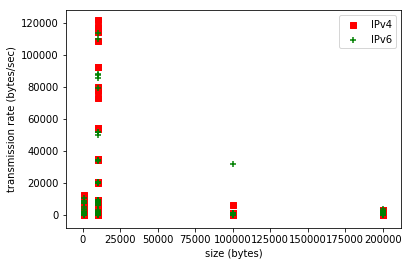

In [71]:
plt.figure()
plt.xlabel("size (bytes)")
plt.ylabel("transmission rate (bytes/sec)")
marker_dict={'IPv4':'s', 'IPv6':'^'}
color_dict={'IPv4':'green', 'IPv6':'red'}
marker=[ marker_dict[i] for i in df['proto'] ]
# print(marker)
# Using a list of colors comes from 
# https://stackoverflow.com/questions/27318906/python-scatter-plot-with-colors-corresponding-to-strings
color=[ color_dict[i] for i in df['proto'] ]
# But then I had a better idea: simply create 2 DFs, one for IPv4 and one for IPv6
# plt.scatter(df["size"],df["rate"], c=color )
plt.scatter(df4['size'], df4.rate, c='r', marker='s', label="IPv4")
plt.scatter(df6['size'], df6.rate, c='g', marker='+', label="IPv6")
plt.legend()
plt.savefig(FILENAME+"_size_rate.svg")
plt.show()
# df.plot(x="size (bytes)",y="data_rate (bytes/sec)", kind="scatter", xlabel="SIZE")

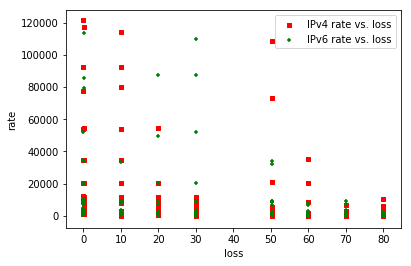

In [72]:
ax = df4.plot(kind="scatter", x="loss",y="rate", color="r", marker="s", label="IPv4 rate vs. loss")
df6.plot(kind="scatter", x="loss",y="rate", color="g", marker="+", label="IPv6 rate vs. loss", ax=ax)
plt.legend()
plt.savefig(FILENAME+"_loss_rate.svg")
plt.show()

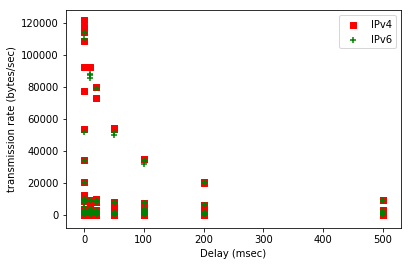

In [73]:
plt.figure();
plt.ylabel("transmission rate (bytes/sec)")
plt.xlabel("Delay (msec)")
plt.scatter(x=df4["delay"], y=df4["rate"], marker="s", c="r", label="IPv4")
plt.scatter(x=df6["delay"], y=df6["rate"], marker="+", c="g", label="IPv6")
plt.legend()
plt.savefig(FILENAME+"_delay_rate.svg")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


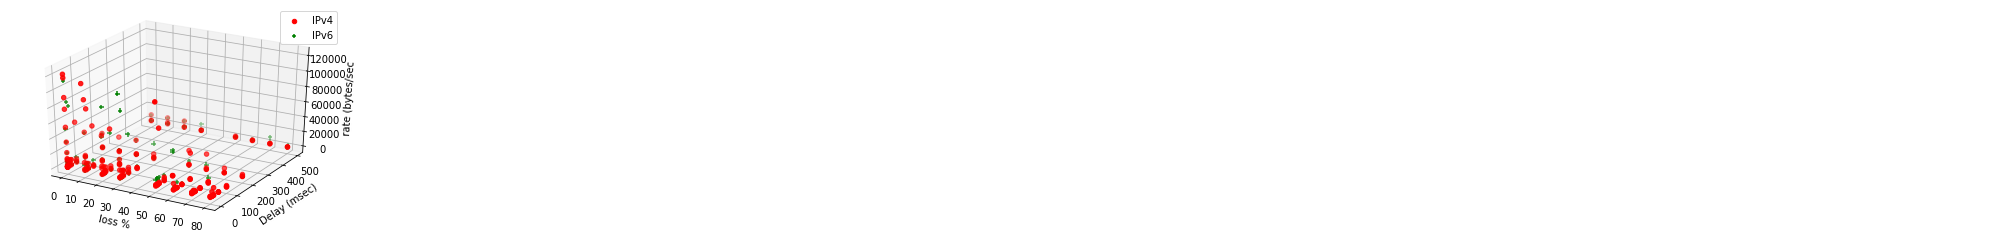

In [74]:
# This is from POC_3d_scatter_plot.py
# From https://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/
# This does NOT work in a jupyter notebook - it doesn't spin or rotate

fig = plt.figure()
plt.ylabel("transmission rate (bytes/sec)")
plt.xlabel("packet loss %")
ax: matplotlib.figure.Figure = fig.add_subplot(111, projection='3d')
ax.set_xlabel('loss %')
ax.set_ylabel('Delay (msec)')
ax.set_zlabel('rate (bytes/sec')

# ax3d = Axes3D(fig=fig)
x4: pd.Series = df4.loss
x4min: float = df4.loss.min()
x4max: float = df4.loss.max()
y4: pd.Series = df4.delay
y4max: float = df4.delay.max()
y4min: float = df4.delay.min()
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html#matplotlib.axes.Axes.set_xlim
# ax3d.set_xlim3d(left=xmin, right=xmax)  # Loss rate from 0% to 100%
# ax3d.set_ylim3d(bottom=ymin, top=ymax)

z4: pd.Series = df4.rate

x6: pd.Series = df6.loss
x6min: float = df6.loss.min()
x6max: float = df6.loss.max()
y6: pd.Series = df6.delay
y6max: float = df6.delay.max()
y6min: float = df6.delay.min()

z6: pd.Series = df6.rate

ax.scatter(x4, y4, z4, c='r', marker='o', label="IPv4")  # noqa

ax.scatter(x6, y6, z6, c='g', marker='+', label="IPv6")  # noqa

plt.legend()

plt.savefig(FILENAME+"_loss_delay_rate_3d.svg")
plt.show()



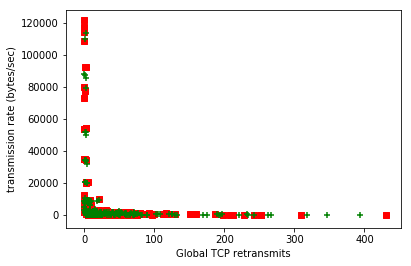

In [75]:
# Is there a correlation bewteen global TCP retries and performance?
plt.figure();
plt.ylabel("transmission rate (bytes/sec)")
plt.xlabel("Global TCP retransmits")
plt.scatter(x=df4["GTRs"], y=df4["rate"], marker="s", c="r");
plt.scatter(x=df6["GTRs"], y=df6["rate"], marker="+", c="g");
plt.savefig(FILENAME+"_GTRs_rate.svg")
plt.show()

In [118]:
x_val_4 = df4.GTRs[(df4.spb < 1.0E+38) & (df4.spb > 0)]
y_val_4 = df4.spb[(df4.spb < 1.0E+38) & (df4.spb > 0)]
x_val_6 = df6.GTRs[(df6.spb < 1.0E+38) & (df6.spb > 0)]
y_val_6 = df6.spb[(df6.spb < 1.0E+38) & (df6.spb > 0)]
print((max(x_val_4), min(x_val_4)),(max(y_val_4), min(y_val_4)))
print((max(x_val_6), min(x_val_6)),(max(y_val_6), min(y_val_6)))


(430, 0) (0.022306491188935983, 8.23045267489712e-06)
(393, 0) (0.03177629488401652, 8.802816901408451e-06)


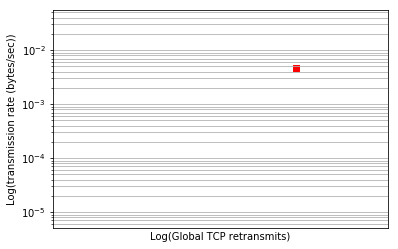

In [119]:
#### THIS IS WHERE I AM RUNNING INTO A PROBLEM

plt.figure();
plt.ylabel("Log(transmission rate (bytes/sec))")
plt.xlabel("Log(Global TCP retransmits)")
plt.grid(True, which="both")
plt.yscale('log')
plt.xscale('log')
plt.tick_params(axis='y', which='minor')
plt.tick_params(axis='x', which='minor')

plt.ylim=(1.0E-07,1.0E-2)
plt.xlim=(1.0,1000.0)
plt.scatter(x=x_val_4, y=y_val_4, marker="s", c="r");
plt.scatter(x=x_val_6, y=y_val_6, marker="+", c="g");
plt.savefig(FILENAME+"_GTRs_rate_LogLog.svg")
plt.show()

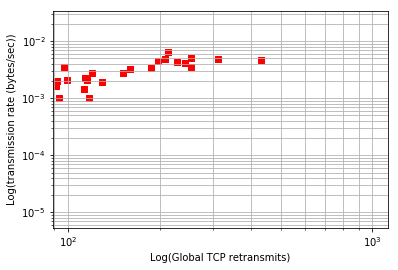

In [120]:
#### THIS WORKS AS EXPECTED, 

plt.figure();
plt.ylabel("Log(transmission rate (bytes/sec))")
plt.xlabel("Log(Global TCP retransmits)")
plt.grid(True, which="both")
plt.yscale('log')
plt.xscale('log')
plt.tick_params(axis='y', which='minor')
plt.tick_params(axis='x', which='minor')

plt.ylim=(1.0E-07,1.0E-2)
plt.xlim=(1.0,1000.0)
plt.scatter(x=x_val_4, y=y_val_4, marker="s", c="r");
# NOTE: the second call to scatter is commented out
# plt.scatter(x=x_val_6, y=y_val_6, marker="+", c="g");
plt.savefig(FILENAME+"_GTRs_rate_LogLog.svg")
plt.show()

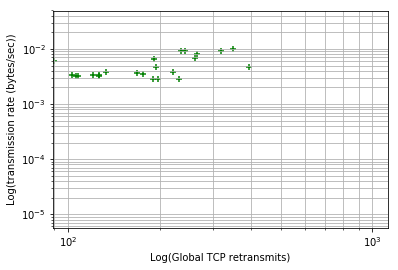

In [122]:
#### THIS ALSO WORKS AS EXPECTED, 

plt.figure();
plt.ylabel("Log(transmission rate (bytes/sec))")
plt.xlabel("Log(Global TCP retransmits)")
plt.grid(True, which="both")
plt.yscale('log')
plt.xscale('log')
plt.tick_params(axis='y', which='minor')
plt.tick_params(axis='x', which='minor')

plt.ylim=(1.0E-07,1.0E-2)
plt.xlim=(1.0,1000.0)
#plt.scatter(x=x_val_4, y=y_val_4, marker="s", c="r");
# NOTE: the first call to scatter is commented out
plt.scatter(x=x_val_6, y=y_val_6, marker="+", c="g");
plt.savefig(FILENAME+"_GTRs_rate_LogLog.svg")
plt.show()

x_val=[0, 3, 4, 5, 3, 4, 6, 0, 1, 0, 0, 0, 1, 5, 0, 0, 0, 27, 8, 10, 5, 0, 1, 0, 2, 9, 0, 3, 0, 0, 0, 2, 22, 2, 4, 49, 7, 7, 2, 5, 0, 16, 0, 9, 22, 6, 18, 7, 16, 15, 8, 20, 15, 35, 10, 36, 21, 11, 8, 0, 2, 1, 0, 2, 4, 4, 0, 5, 6, 2, 0, 3, 6, 0, 1, 0, 0, 1, 3, 5, 3, 36, 8, 2, 6, 2, 8, 15, 11, 5, 8, 28, 3, 18, 0, 20, 0, 31, 19, 3, 31, 27, 6, 30, 10, 0, 5, 38, 10, 5, 5, 14, 3, 3, 8, 37, 62, 5, 0, 9, 9, 12, 11, 8, 8, 13, 8, 11, 9, 8, 13, 9, 9, 11, 10, 8, 37, 21, 15, 9, 8, 13, 17, 9, 31, 14, 34, 7, 36, 39, 22, 6, 12, 24, 66, 85, 38, 39, 30, 15, 213, 31, 97, 129, 32, 160, 90, 37, 99, 61, 41, 187, 22, 68, 115, 120, 117, 10, 47, 92, 80, 198, 11, 18, 12, 13, 12, 17, 7, 8, 13, 8, 12, 16, 7, 17, 9, 21, 8, 13, 18, 40, 11, 43, 18, 22, 9, 37, 24, 57, 40, 30, 32, 31, 13, 22, 62, 21, 35, 28, 151, 228, 41, 45, 76, 253, 310, 242, 61, 72, 42, 113, 93, 430, 56, 91, 114, 66, 253, 208, 66, 41, 60]...
 y_val=[8.183306055646482e-05, 0.0011310937676733402, 0.0011305822498586771, 0.0011931750387781887, 0.000284

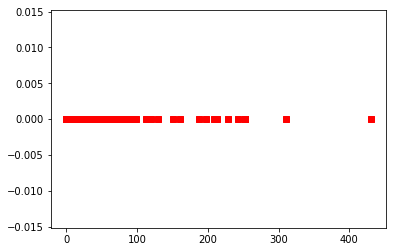

In [81]:
# From https://stackoverflow.com/questions/50418627/python-pandas-linear-regression-curve
def slope_intercept(x_val, y_val):
    print(f"x_val={x_val}...\n y_val={y_val}")
    x = np.array(x_val)
    y = np.array(y_val)
    m = ( ( (np.mean(x)*np.mean(y) ) - np.mean(x*y)) /
        ( ( np.mean(x)*np.mean(x)) - np.mean(x*x)))

    m = round(m,2)
    b=(np.mean(y)-np.mean(x)*m)
    b=round(b,2)
    return m,b
# df4.spb has some places where the value is inf (infinity).  Filter those out
# 1.0E+38 is a proxy for infinity
x_val=df4.GTRs[df4.spb < 1.0E+38].tolist()
y_val=df4.spb[df4.spb < 1.0E+38].tolist()
m,b=slope_intercept(x_val, y_val)
print(f"m={m}, b={b}")
df4['reg_line'] = [(m*x)+b for x in df4.GTRs.tolist()]
print(df4.reg_line)
plt.figure()
# plt.scatter(x=df4["GTRs"], y=df4['reg_line'], color="r", marker="s", label="IPv4 linear regression")
plt.scatter(x=df4.GTRs, y=df4.reg_line, color="r", marker="s", label="IPv4 linear regression")
plt.show()                  

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3103: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


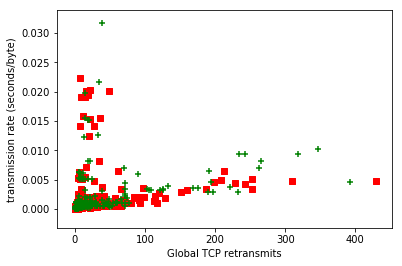

In [77]:
# That looks like a reciprocal relationship
plt.figure();
x_new_4 = np.arange(len(df4))
slope, intercept, r_value, p_value, std_err = stats.linregress(df4["GTRs"],df4.spb)
line_4 = intercept + slope*x_new_4
plt.plot(line_4, "r-")

plt.ylabel("transmission rate (seconds/byte)")
plt.xlabel("Global TCP retransmits")
plt.scatter(x=df4["GTRs"], y=df4['spb'], marker="s", c="r")
plt.scatter(x=df6["GTRs"], y=df6['spb'], marker="+", c="g")



plt.savefig(FILENAME+"_GTRs_SpB.svg")
plt.show()


In [ ]:
df.columns

In [ ]:
def df_to_a(df_lcl):
    row_dict=dict()     # Holds row in array that has loss (a float) as a key
    col_dict=dict()     # holds col in array that has delay (a float) as a key
    row_ctr=0
    col_ctr=0
    for i in range(len(df_lcl.index)):
        row=df_lcl.iloc[i]
        rate=row['data_rate (bytes/sec)']
        delay=row['Delay (ms)']
        loss=row['loss_percent']
        print(f"{i:3d}, {delay:8.2f}, {loss:8.2f}%. {rate:9.2f}" )

df_to_a(df4)

In [ ]:
# Use a pivot table?
# From https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
pivot_table=pd.pivot_table(df4, values="data_rate (bytes/sec)", index=['Delay (ms)', 'loss_percent' ],
                          aggfunc=np.min)
pivot_table

In [ ]:
# Use a pivot table?  The last try had very little variation
# From https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
pivot_table=pd.pivot_table(df4, values="data_rate (bytes/sec)", index=['Delay (ms)', 'loss_percent' ])
pivot_table

In [ ]:
df4.sort_values(by="data_rate (bytes/sec)")